Latihan Olah Dataset Depo
- Drop Kolom
- Drop NULL Value
- Sorting Data Berdasarkan Kolom tertentu
- Asign Nomor Urut menggunakan Numpy.arange otomatis
- Atur Urutan Kolom
- Membuat rekap menggunakan pivot_table
- Membuat Pie Chart

In [1]:
import pandas as pd
colnames=['ID', 'Kode_Daop', 'Nama_Depo', 'Kode_Pemilik', 'Jenis', 'Ket', 'Koordinat_X', 'Koordinat_Y', 'Created_at', 'Updated_at'] 
data = pd.read_csv('../data_source/depo/tbldepos_100721.csv', header=None, names=colnames)
data.head()


,ID,Kode_Daop,Nama_Depo,Kode_Pemilik,Jenis,Ket,Koordinat_X,Koordinat_Y,Created_at,Updated_at
0,14,7,Depo Lokomotif Tanah Abang,2,Depo Sarana Penggerak,NaN,-6.184171,106.810808,NaN,NaN
1,15,7,Depo Lokomotif Cipinang,2,Depo Sarana Penggerak,NaN,-6.214354,106.880702,NaN,NaN
2,16,7,Depo Kereta JakartaKota,2,Depo Sarana Tanpa Penggerak,NaN,-6.134634,106.823285,NaN,NaN
3,17,24,Depo KRL BukitDuri,3,Depo Sarana Penggerak,NaN,-6.217738,106.861169,NaN,NaN
4,18,24,Depo KRL Depok,1,Depo Sarana Penggerak,NaN,-6.416477,106.811902,NaN,NaN


In [2]:
data.tail()


,ID,Kode_Daop,Nama_Depo,Kode_Pemilik,Jenis,Ket,Koordinat_X,Koordinat_Y,Created_at,Updated_at
63,80,11,Depo Mekanik Kroya,2,Depo Sarana Penggerak,NaN,-7.629424,109.115655,NaN,NaN
64,81,13,Depo Mekanik Madiun,2,Depo Sarana Penggerak,NaN,-7.619409,111.526689,NaN,NaN
65,82,9,Depo Gerbong Arjowinangun,2,Depo Sarana Tanpa Penggerak,NaN,-6.644540,108.411692,NaN,NaN
66,83,12,Depo Gerbong Rowulu,2,Depo Sarana Tanpa Penggerak,NaN,-7.797919,110.276980,NaN,NaN
67,84,17,Depo Gerbong BukitPutus,2,Depo Sarana Tanpa Penggerak,NaN,-0.986319,100.384411,NaN,NaN


In [3]:
col_pemilik=['id', 'nama_pemilik', 'alamat'] 
df_pemilik = pd.read_csv('../data_source/datsar/tblpemiliksaranas.csv', names=col_pemilik, usecols=['id', 'nama_pemilik', 'alamat'])
df_pemilik.drop(columns =['alamat'], inplace=True)
df_pemilik.head()

,id,nama_pemilik
0,1,Ditjen Perkeretaapian
1,2,PT Kereta Api Indonesia (Persero)
2,3,PT Kereta Commuter Indonesia
3,4,PT Railink
4,5,PT MRT Jakarta


In [4]:
col_daop =['id', 'nama_daop'] 
df_daop = pd.read_csv('../data_source/datsar/tbldaops_updatebtp.csv', names=col_daop, usecols=['id', 'nama_daop'])
df_daop.head()

,id,nama_daop
0,7,DAOP 1 JAKARTA
1,8,DAOP 2 BANDUNG
2,9,DAOP 3 CIREBON
3,10,DAOP 4 SEMARANG
4,11,DAOP 5 PURWOKERTO


In [5]:
join_df = data.set_index('Kode_Pemilik').join(df_pemilik.set_index('id'), how='left')
join_df2 = join_df.set_index('Kode_Daop').join(df_daop.set_index('id'), how='left')
print(join_df2.head())
print(join_df2.tail())

   ID                   Nama_Depo                        Jenis  Ket  \
7  14  Depo Lokomotif Tanah Abang        Depo Sarana Penggerak  NaN   
7  15     Depo Lokomotif Cipinang        Depo Sarana Penggerak  NaN   
7  16     Depo Kereta JakartaKota  Depo Sarana Tanpa Penggerak  NaN   
7  19  Depo Gerbong JakartaGudang  Depo Sarana Tanpa Penggerak  NaN   
7  57  Depo Kereta Rangkas Bitung  Depo Sarana Tanpa Penggerak  NaN   

   Koordinat_X  Koordinat_Y  Created_at  Updated_at  \
7    -6.184171   106.810808         NaN         NaN   
7    -6.214354   106.880702         NaN         NaN   
7    -6.134634   106.823285         NaN         NaN   
7    -6.133301   106.818028         NaN         NaN   
7    -6.352703   106.253297         NaN         NaN   

                        nama_pemilik       nama_daop  
7  PT Kereta Api Indonesia (Persero)  DAOP 1 JAKARTA  
7  PT Kereta Api Indonesia (Persero)  DAOP 1 JAKARTA  
7  PT Kereta Api Indonesia (Persero)  DAOP 1 JAKARTA  
7  PT Kereta Api Indon

In [6]:
data_depo_all = join_df2[['ID', 'nama_daop', 'Nama_Depo', 'nama_pemilik', 'Jenis', 'Koordinat_X', 'Koordinat_Y']]

In [7]:
data.shape

(68, 10)

In [8]:
data_depo_all.shape

(68, 7)

In [9]:
data_depo_all.columns = data_depo_all.columns.str.upper()

In [10]:
data_depo_all

,ID,NAMA_DAOP,NAMA_DEPO,NAMA_PEMILIK,JENIS,KOORDINAT_X,KOORDINAT_Y
7,14,DAOP 1 JAKARTA,Depo Lokomotif Tanah Abang,PT Kereta Api Indonesia (Persero),Depo Sarana Penggerak,-6.184171,106.810808
7,15,DAOP 1 JAKARTA,Depo Lokomotif Cipinang,PT Kereta Api Indonesia (Persero),Depo Sarana Penggerak,-6.214354,106.880702
7,16,DAOP 1 JAKARTA,Depo Kereta JakartaKota,PT Kereta Api Indonesia (Persero),Depo Sarana Tanpa Penggerak,-6.134634,106.823285
7,19,DAOP 1 JAKARTA,Depo Gerbong JakartaGudang,PT Kereta Api Indonesia (Persero),Depo Sarana Tanpa Penggerak,-6.133301,106.818028
7,57,DAOP 1 JAKARTA,Depo Kereta Rangkas Bitung,PT Kereta Api Indonesia (Persero),Depo Sarana Tanpa Penggerak,-6.352703,106.253297
...,...,...,...,...,...,...,...
26,66,DIVRE IV LAMPUNG,Depo Lokomotif TanjungKarang,PT Kereta Api Indonesia (Persero),Depo Sarana Penggerak,-5.406307,105.261059
26,68,DIVRE IV LAMPUNG,Depo Gerbong Tarahan,PT Kereta Api Indonesia (Persero),Depo Sarana Tanpa Penggerak,-5.502397,105.333264
27,74,PROV DKI JAKARTA,Depo MRT Lebak Bulus,PT MRT Jakarta,Depo Sarana Penggerak,-6.290257,106.773462
27,76,PROV DKI JAKARTA,Depo LRT KelapaGading,PT LRT Jakarta,Depo Sarana Penggerak,-6.157469,106.913267


In [11]:
data_depo_all['NAMA_DEPO'] = data_depo_all['NAMA_DEPO'].str.upper()

<ipython-input-11-1caddb501248>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_depo_all['NAMA_DEPO'] = data_depo_all['NAMA_DEPO'].str.upper()


In [12]:
data_depo_all['NAMA_DEPO'] = data_depo_all['NAMA_DEPO'].str.strip()

<ipython-input-12-f55271235919>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_depo_all['NAMA_DEPO'] = data_depo_all['NAMA_DEPO'].str.strip()


In [13]:
data_depo_all.dtypes

ID                int64
NAMA_DAOP        object
NAMA_DEPO        object
NAMA_PEMILIK     object
JENIS            object
KOORDINAT_X     float64
KOORDINAT_Y     float64
dtype: object

In [14]:
#data_depo_all['KOORDINAT_X'] = data_depo_all['KOORDINAT_X'].astype('str')
#data_depo_all['KOORDINAT_Y'] = data_depo_all['KOORDINAT_Y'].astype('str')


In [27]:
data_depo_all['KOORDINAT_X'] = data_depo_all['KOORDINAT_X'].map(lambda x : round(x, 6))

In [28]:
data_depo_all['KOORDINAT_Y'] = data_depo_all['KOORDINAT_Y'].map(lambda x : round(x, 6))

In [29]:
data_depo_all

,ID,NAMA_DAOP,NAMA_DEPO,NAMA_PEMILIK,JENIS,KOORDINAT_X,KOORDINAT_Y
25,71,BALAI PERAWATAN,BALAI PERAWATAN,Ditjen Perkeretaapian,Depo Sarana Penggerak,-7.143495,110.897592
7,19,DAOP 1 JAKARTA,DEPO GERBONG JAKARTAGUDANG,PT Kereta Api Indonesia (Persero),Depo Sarana Tanpa Penggerak,-6.133301,106.818028
7,16,DAOP 1 JAKARTA,DEPO KERETA JAKARTAKOTA,PT Kereta Api Indonesia (Persero),Depo Sarana Tanpa Penggerak,-6.134634,106.823285
7,67,DAOP 1 JAKARTA,DEPO KERETA JAKARTAMANGGARAI,PT Kereta Api Indonesia (Persero),Depo Sarana Tanpa Penggerak,-6.212081,106.846845
7,57,DAOP 1 JAKARTA,DEPO KERETA RANGKAS BITUNG,PT Kereta Api Indonesia (Persero),Depo Sarana Tanpa Penggerak,-6.352703,106.253297
...,...,...,...,...,...,...,...
27,76,PROV DKI JAKARTA,DEPO LRT KELAPAGADING,PT LRT Jakarta,Depo Sarana Penggerak,-6.157469,106.913267
27,74,PROV DKI JAKARTA,DEPO MRT LEBAK BULUS,PT MRT Jakarta,Depo Sarana Penggerak,-6.290257,106.773462
24,42,PT KAI COMMUTER JABOTABEK,DEPO KRL BOGOR,PT Kereta Commuter Indonesia,Depo Sarana Penggerak,-6.591201,106.791453
24,17,PT KAI COMMUTER JABOTABEK,DEPO KRL BUKITDURI,PT Kereta Commuter Indonesia,Depo Sarana Penggerak,-6.217738,106.861169


In [15]:
data_depo_all.isna().sum()

ID              0
NAMA_DAOP       0
NAMA_DEPO       0
NAMA_PEMILIK    0
JENIS           0
KOORDINAT_X     0
KOORDINAT_Y     0
dtype: int64

In [16]:
data_depo_all.shape

(68, 7)

In [17]:
#data.dropna(inplace=True)

In [18]:
#data.shape

In [19]:
data_depo_all = data_depo_all.sort_values(["NAMA_DAOP", "NAMA_DEPO"])


In [20]:
import numpy as np
Nomor = np.arange(1,46)
print(Nomor)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [21]:
jumlah_depo = data_depo_all.groupby(['JENIS'])['NAMA_DEPO'].count().reset_index()
print(jumlah_depo)

                         JENIS  NAMA_DEPO
0        Depo Sarana Penggerak         34
1  Depo Sarana Tanpa Penggerak         34


In [22]:
labels = jumlah_depo['JENIS']
print(labels)
print (type(labels))

0          Depo Sarana Penggerak
1    Depo Sarana Tanpa Penggerak
Name: JENIS, dtype: object
<class 'pandas.core.series.Series'>


In [23]:
sizes = jumlah_depo['NAMA_DEPO']
print(sizes)
print(type(sizes))

0    34
1    34
Name: NAMA_DEPO, dtype: int64
<class 'pandas.core.series.Series'>


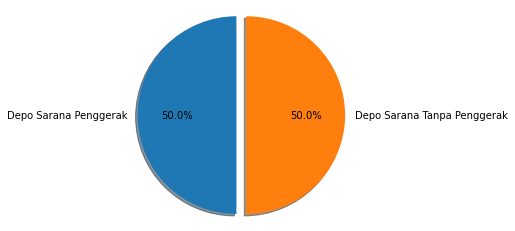

In [24]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = jumlah_depo['JENIS']
#sizes = [19, 27]
sizes = jumlah_depo['NAMA_DEPO']
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [30]:
data_depo_all.to_csv(path_or_buf='../data_source/depo/depo_after.csv', sep=',')